In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Table_Optimal2015-08-15.csv')

In [3]:
print df.dtypes

$c^{1}$       int64
$c^{2}$       int64
$c^{3}$       int64
$c^{4}$       int64
$c^{5}$       int64
$y^{1}$       int64
$y^{2}$       int64
$y^{3}$       int64
$y^{4}$       int64
$y^{5}$       int64
$t$           int64
ExpValue    float64
$d_{0}$       int64
$d_{1}$       int64
$d_{2}$       int64
$d_{3}$       int64
$d_{4}$       int64
$d_{5}$       int64
dtype: object


In [202]:
df_Series2 = pd.DataFrame(index=['$d_{0}$', '%%%%%'], columns=range(6))

for j in df.groupby('$d_{0}$').size().index:
    df_Series2[j]['$d_{0}$'] = df.groupby('$d_{0}$').size()[j]
for j in df.groupby('$d_{0}$').size().index:    
    df_Series2[j]['%%%%%'] = np.around((df_Series2[j]['$d_{0}$']/df_Series2.sum(axis=1)['$d_{0}$'])*100, 2)

print df_Series2.to_latex()

\begin{tabular}{lllllll}
\toprule
{} &      0 &     1 &     2 &     3 &      4 &    5 \\
\midrule
\$d\_\{0\}\$ &  30000 &    55 &   218 &   914 &   4386 &  NaN \\
\%\%\%\%\%   &  84.33 &  0.15 &  0.61 &  2.57 &  12.33 &  NaN \\
\bottomrule
\end{tabular}



In [207]:
df_Series = pd.DataFrame(index=df.dtypes[13:].index, columns=[0, 1,  2, 3])

for i in df.dtypes[13:].index:
    for j in df.groupby(i).size().index:
        df_Series[j][i] = df.groupby(i).size()[j]
    
for i in range(4):
    df_Series[str(i)+'%'] = pd.Series((df_Series[i]/df_Series.sum(axis=1))*100)
    for j in df_Series.index:
        df_Series[str(i)+'%'][j] = np.around(df_Series[str(i)+'%'][j], 2)
    
df_Series = df_Series.reindex_axis([0, '0%', 1, '1%', 2, '2%', 3, '3%'], axis=1)

print df_Series.to_latex()

\begin{tabular}{lllllllll}
\toprule
{} &      0 &     0\% &      1 &     1\% &      2 &     2\% &     3 &    3\% \\
\midrule
\$d\_\{1\}\$ &  35518 &  99.85 &    NaN &    NaN &    NaN &    NaN &    55 &  0.15 \\
\$d\_\{2\}\$ &  34998 &  98.38 &     70 &    0.2 &    335 &   0.94 &   170 &  0.48 \\
\$d\_\{3\}\$ &  32670 &  91.84 &    878 &   2.46 &   1471 &   4.12 &   554 &  1.55 \\
\$d\_\{4\}\$ &  21941 &  61.68 &    378 &   1.06 &  11360 &  31.88 &  1894 &  5.31 \\
\$d\_\{5\}\$ &  10526 &  29.59 &  14285 &  40.12 &  10762 &  30.19 &   NaN &   NaN \\
\bottomrule
\end{tabular}



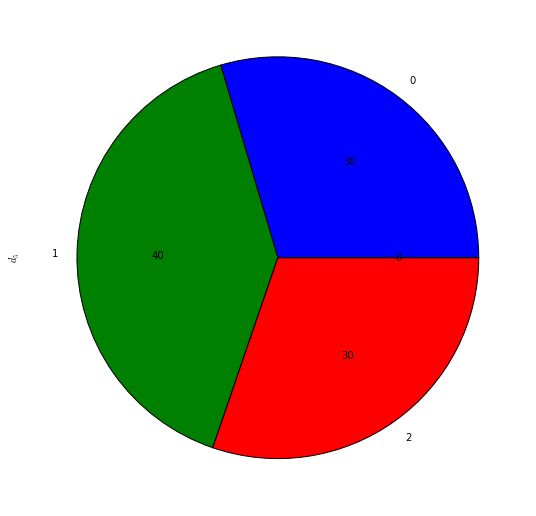

In [39]:
df_Series.T['$d_{5}$'].plot(kind='pie', autopct='%.0f', figsize=(9, 9))

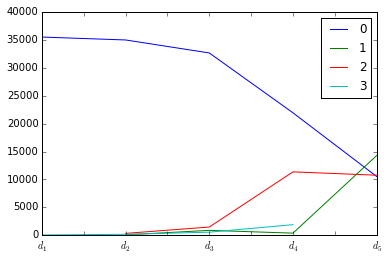

In [6]:
#plt.title("Verkauf der optimalen Politik")
#plt.ylabel("p[j](t)")
#plt.xlabel("t")
plt.figure()
df_Series.plot();